In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
selected_features = pd.read_csv('data/selected_features.csv')
target_column = 'price actual'
y = selected_features[target_column]

In [4]:
try: 
    selected_features.drop(target_column, axis=1, inplace=True)
    selected_features.drop(target_column + ' ewm', axis=1, inplace=True)
except:
    print('Already dropped')

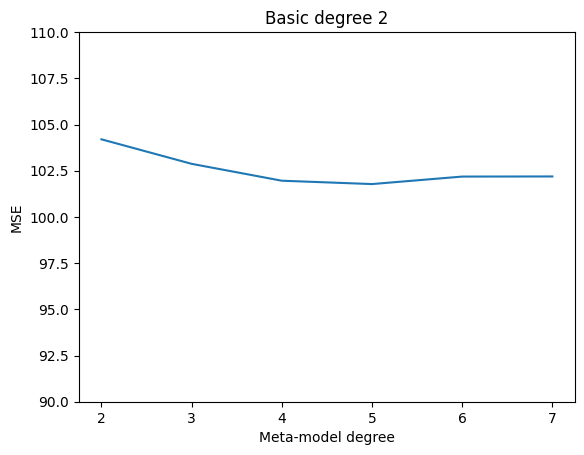

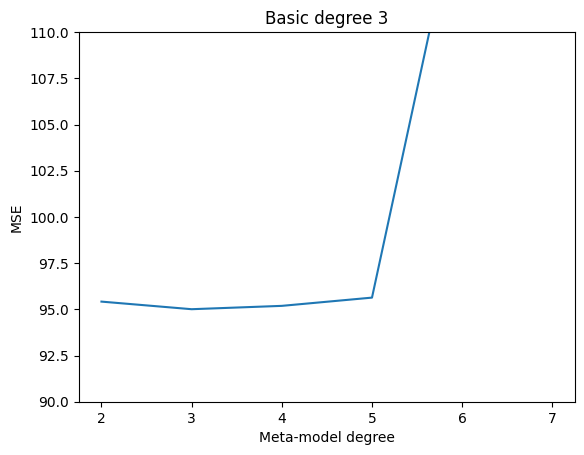

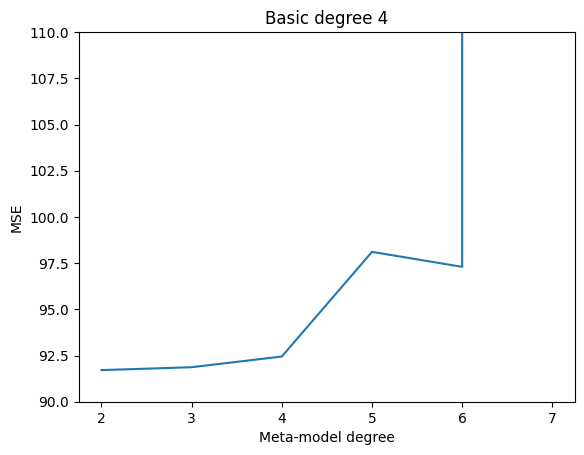

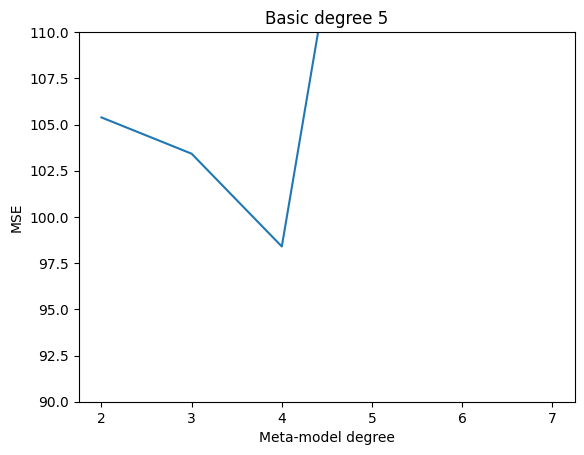

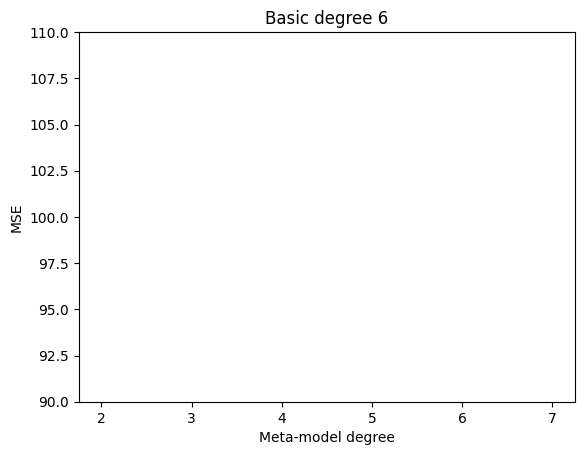

In [12]:
x = selected_features[selected_features.columns]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

for basic_degree in range(2,7):
    mse_list = []
    model1 = make_pipeline(PolynomialFeatures(basic_degree), LinearRegression())
    model1.fit(x_train, y_train)
    val_pred1 = model1.predict(x_val)
    test_pred1 = model1.predict(x_test)

    model2 = LinearRegression()
    model2.fit(x_train, y_train)
    val_pred2 = model2.predict(x_val)
    test_pred2 = model2.predict(x_test)

    # Creating dataframes for meta-model training and prediction
    df_val = pd.DataFrame({'pred1': val_pred1, 'pred2': val_pred2})
    df_test = pd.DataFrame({'pred1': test_pred1, 'pred2': test_pred2})

    for degree in range(2,8):
        meta_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        meta_model.fit(df_val, y_val)
        y_pred = meta_model.predict(df_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
    plt.plot(range(2,8), mse_list)
    plt.title(f'Basic degree {basic_degree}')
    plt.xlabel('Meta-model degree')
    plt.ylabel('MSE')
    plt.ylim(90, 110)
    plt.show()


Mean Squared Error (MSE): 91.71091980689516


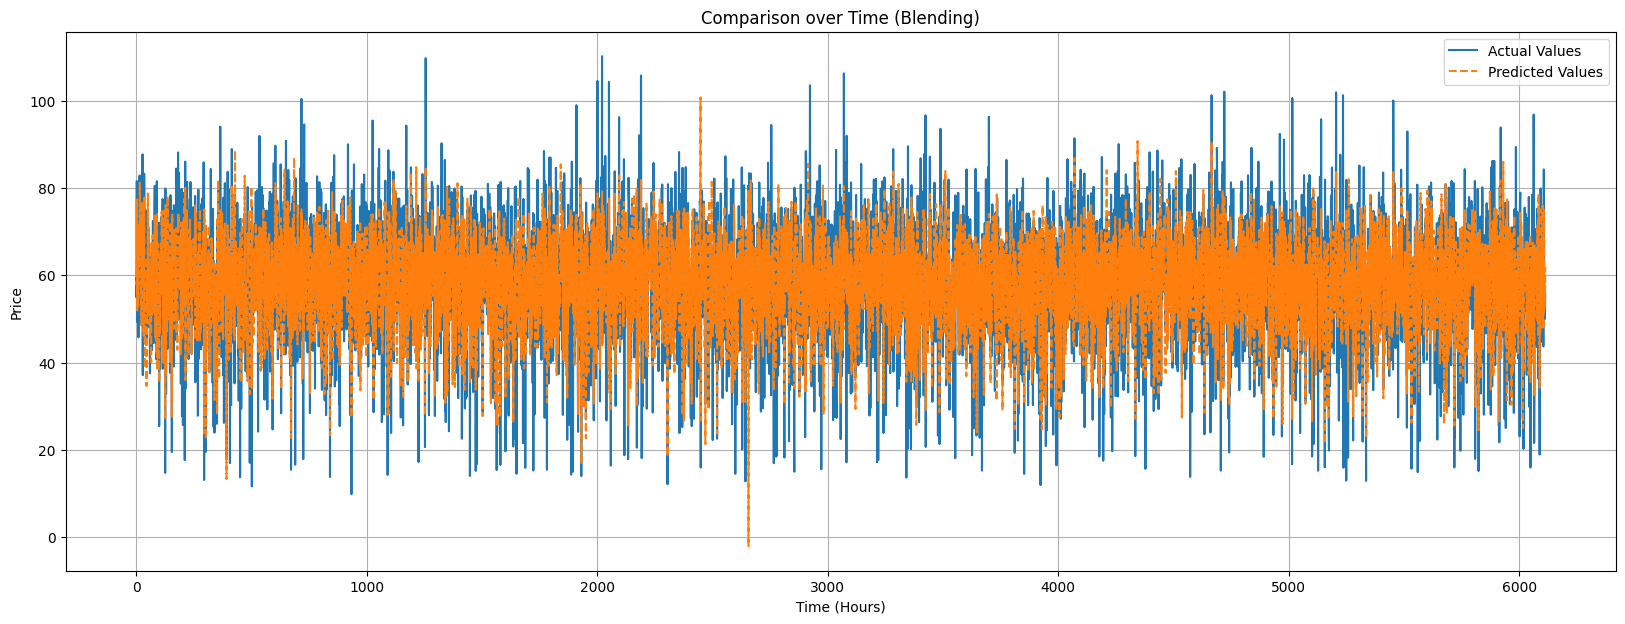

In [7]:
x = selected_features[selected_features.columns]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

model1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model1.fit(x_train, y_train)
val_pred1 = model1.predict(x_val)
test_pred1 = model1.predict(x_test)

model2 = LinearRegression()
model2.fit(x_train, y_train)
val_pred2 = model2.predict(x_val)
test_pred2 = model2.predict(x_test)

# Creating dataframes for meta-model training and prediction
df_val = pd.DataFrame({'pred1': val_pred1, 'pred2': val_pred2})
df_test = pd.DataFrame({'pred1': test_pred1, 'pred2': test_pred2})

meta_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
meta_model.fit(df_val, y_val)
y_pred = meta_model.predict(df_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

plt.figure(figsize=(20, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time (Hours)')
plt.ylabel('Price')
plt.title('Comparison over Time (Blending)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
blending = pd.DataFrame(y_pred)
blending[1] = y_test.reset_index(drop=True)
blending.to_csv('data/blending.csv', index=False, header=False)